In [17]:
!pip install kaggle
!pip install tqdm

    100% |████████████████████████████████| 51kB 3.1MB/s 


In [0]:
!mkdir .kaggle

In [0]:
!mv kaggle.json ./.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

test.zip: Downloaded 271MB of 271MB
train.zip: Downloaded 544MB of 544MB
sample_submission.csv: Downloaded 111KB of 111KB


In [0]:
!mv ./.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/* ./

In [0]:
!unzip -q test.zip

In [0]:
!unzip -q train.zip

In [0]:
import os
train_im = os.listdir('train/')
test_im = os.listdir('test/')

In [0]:
m_train, m_test = len(train_im), len(test_im)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

(374, 500, 3)


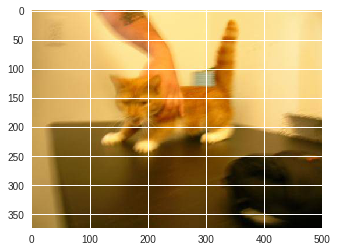

In [12]:
img = plt.imread('train/cat.0.jpg')
print(img.shape)
plt.imshow(img)

In [0]:
def imcrop_tosquare(img):
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

In [0]:
from scipy.misc import imresize

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


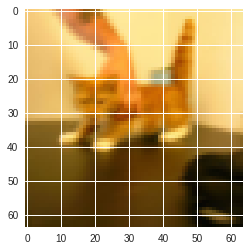

In [15]:
crop = imcrop_tosquare(img)
rsz = imresize(crop, size=(64,64))
plt.imshow(rsz)

In [0]:
import numpy as np

In [0]:
X_train = []
y_train = []
X_test = []

In [0]:
im_size = 64

In [0]:
from tqdm import tqdm

In [21]:
print('Cropping and Resizing Training Images...')
for i in tqdm(range(m_train)):
  img = plt.imread('train/'+train_im[i])
  crop = imcrop_tosquare(img)
  rsz = imresize(crop, size=(im_size,im_size))
  X_train += [rsz]
  y_train += [train_im[i][:3]]

print('\nCropping and Resizing Test Images...')
for i in tqdm(range(m_test)):
  img = plt.imread('test/'+str(i+1)+'.jpg')
  crop = imcrop_tosquare(img)
  rsz = imresize(crop, size=(im_size,im_size))
  X_test += [rsz]

  0%|          | 0/25000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):
  0%|          | 16/25000 [00:00<02:38, 157.89it/s]

Cropping and Resizing Training Images...


  0%|          | 21/12500 [00:00<01:01, 203.07it/s]


Cropping and Resizing Test Images...


100%|██████████| 12500/12500 [01:08<00:00, 182.24it/s]


In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [22]:
LE = LabelEncoder()
LE.fit(y_train)

LabelEncoder()

In [23]:
LE.classes_

array(['cat', 'dog'], dtype='<U3')

In [24]:
y_train = LE.transform(y_train)
y_train = np.expand_dims(y_train, 1)
print(y_train.shape)
print(y_train[:5])

(25000, 1)
[[0]
 [1]
 [0]
 [1]
 [0]]


In [25]:
LE.inverse_transform([[0], [1]])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([['cat'],
       ['dog']], dtype='<U3')

In [26]:
scaler = StandardScaler()
scaler.fit(X_train.reshape((m_train, -1)))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_train = scaler.transform(X_train.reshape((m_train, -1))).reshape((m_train, im_size, im_size, 3))
X_test = scaler.transform(X_test.reshape((m_test, -1))).reshape((m_test, im_size, im_size, 3))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
import pickle
file = open('SS&LE.pk', 'wb')
pickle.dump([scaler, LE], file)
file.close()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [30]:
np.bincount(np.squeeze(y_train)), np.bincount(np.squeeze(y_val))

(array([11235, 11265]), array([1265, 1235]))

In [0]:
np.save('X_test', X_test)
np.save('X_train', X_train)
np.save('X_val', X_val)
np.save('y_train', y_train)
np.save('y_val', y_val)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
im_size = 64
X_train = np.load('X_train.npy')
X_val = np.load('X_val.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.regularizers import l2

Using TensorFlow backend.


In [3]:
conv1 = Conv2D(32, (3, 3), activation='relu', input_shape=(im_size, im_size, 3), padding='same')
batnorm1 = BatchNormalization()
dropout1 = Dropout(0.5)
conv2 = Conv2D(32, (3, 3), activation='relu', strides=2, padding='same')
batnorm2 = BatchNormalization()
dropout2 = Dropout(0.5)

conv3 = Conv2D(64, (5, 5), activation='relu', padding='same')
batnorm3 = BatchNormalization()
dropout3 = Dropout(0.5)
conv4 = Conv2D(64, (5, 5), activation='relu', strides=2, padding='same')
batnorm4 = BatchNormalization()
dropout4 = Dropout(0.5)

conv5 = Conv2D(128, (5, 5), activation='relu', padding='same')
batnorm5 = BatchNormalization()
dropout5 = Dropout(0.5)
conv6 = Conv2D(128, (5, 5), activation='relu', strides=2, padding='same')
batnorm6 = BatchNormalization()
dropout6 = Dropout(0.5)

conv7 = Conv2D(256, (5, 5), activation='relu', padding='same')
batnorm7 = BatchNormalization()
dropout7 = Dropout(0.5)
conv8 = Conv2D(256, (5, 5), activation='relu', strides=2, padding='same')
batnorm8 = BatchNormalization()
dropout8 = Dropout(0.5)

conv9 = Conv2D(512, (5, 5), activation='relu', padding='same')
batnorm9 = BatchNormalization()
dropout9 = Dropout(0.5)
conv10 = Conv2D(512, (5, 5), activation='relu', strides=2, padding='same')
batnorm10 = BatchNormalization()
dropout10 = Dropout(0.5)

flat = Flatten()

# dense1 = Dense(8192, activation='relu')
# dropout1 = Dropout(0.5)

# dense2 = Dense(1024, activation='relu')
# dropout2 = Dropout(0.5)

# dense3 = Dense(128, activation='relu')
# dropout3 = Dropout(0.5)

dense = Dense(1, activation='sigmoid')


lyrs = [conv1, batnorm1, dropout1, conv2, batnorm2, dropout2, \
        conv3, batnorm3, dropout3, conv4, batnorm4, dropout4, \
        conv5, batnorm5, dropout5, conv6, batnorm6, dropout6, \
        conv7, batnorm7, dropout7, conv8, batnorm8, dropout8, \
        conv9, batnorm9, dropout9, conv10, batnorm10, dropout10, \
#         flat, dense1, dropout1, dense2, dropout2, dense3, dropout3,\
        flat, dense]
model = Sequential(lyrs)

opt = Adam(1e-3)
model.compile(loss='binary_crossentropy',
              optimizer=opt, metrics=['binary_accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=50, \
          validation_data=(X_val, y_val))
val_loss, val_accuracy = model.evaluate(X_val, y_val, batch_size=32)
print('Validation Loss:', val_loss, '\tValidation Accuracy:', val_accuracy)


Train on 22500 samples, validate on 2500 samples
Epoch 1/50
20416/22500 [==========================>...] - ETA: 10s - loss: 0.9213 - binary_accuracy: 0.552222500/22500 [==============================] - 112s 5ms/step - loss: 0.9008 - binary_accuracy: 0.5584 - val_loss: 0.6985 - val_binary_accuracy: 0.5916
Epoch 2/50
11552/22500 [==============>...............] - ETA: 51s - loss: 0.6970 - binary_accuracy: 0.623922500/22500 [==============================] - 109s 5ms/step - loss: 0.6904 - binary_accuracy: 0.6343 - val_loss: 0.9115 - val_binary_accuracy: 0.5100
Epoch 3/50
 8256/22500 [==========>...................] - ETA: 1:07 - loss: 0.6603 - binary_accuracy: 0.658122500/22500 [==============================] - 109s 5ms/step - loss: 0.6328 - binary_accuracy: 0.6717 - val_loss: 2.9597 - val_binary_accuracy: 0.5680
Epoch 4/50
 7040/22500 [========>.....................] - ETA: 1:13 - loss: 0.6021 - binary_accuracy: 0.700022500/22500 [==============================] - 109s 5ms/step - loss:

 6272/22500 [=======>......................] - ETA: 1:18 - loss: 0.1750 - binary_accuracy: 0.929022500/22500 [==============================] - 111s 5ms/step - loss: 0.1756 - binary_accuracy: 0.9281 - val_loss: 0.2623 - val_binary_accuracy: 0.8836
Epoch 33/50
 6272/22500 [=======>......................] - ETA: 1:18 - loss: 0.2268 - binary_accuracy: 0.902922500/22500 [==============================] - 111s 5ms/step - loss: 0.1945 - binary_accuracy: 0.9192 - val_loss: 0.2020 - val_binary_accuracy: 0.9172
Epoch 34/50
 6272/22500 [=======>......................] - ETA: 1:18 - loss: 0.1607 - binary_accuracy: 0.936722500/22500 [==============================] - 111s 5ms/step - loss: 0.1611 - binary_accuracy: 0.9336 - val_loss: 0.2145 - val_binary_accuracy: 0.9172
Epoch 35/50
 6272/22500 [=======>......................] - ETA: 1:18 - loss: 0.1580 - binary_accuracy: 0.935722500/22500 [==============================] - 111s 5ms/step - loss: 0.1630 - binary_accuracy: 0.9344 - val_loss: 0.2067 - 

Validation Set Accuracy Achieved = 92.56%

In [66]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

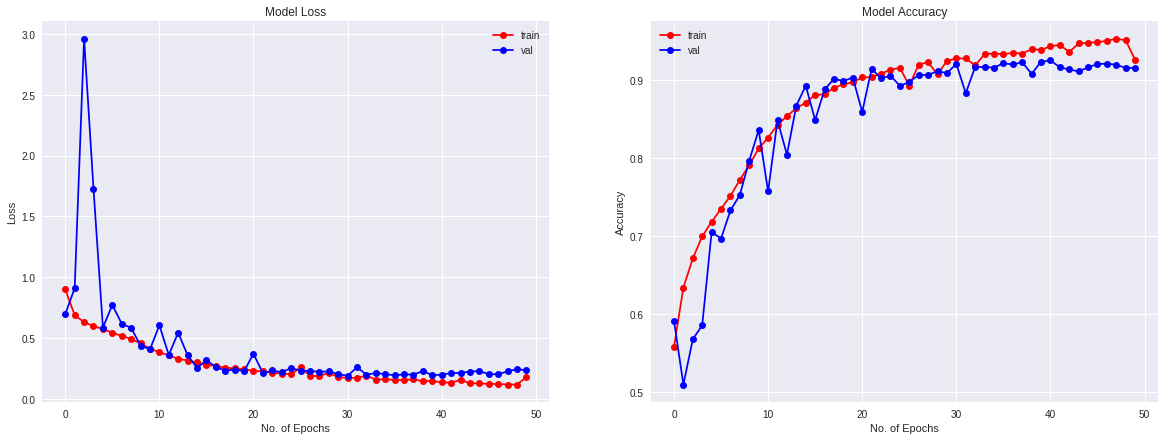

In [4]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'ro-', label='train')
plt.plot(history.history['val_loss'], 'bo-', label='val')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], 'ro-',label='train')
plt.plot(history.history['val_binary_accuracy'], 'bo-', label='val')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [5]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model.h5")
print("Loaded model from disk")

In [0]:
import pandas as pd

In [0]:
sample = pd.read_csv('./sample_submission.csv')

In [33]:
sample.head()

,id,label
0,1,0.5
1,2,0.5
2,3,0.5
3,4,0.5
4,5,0.5


In [0]:
pred = model.predict(X_test)

[[0.62429214]
 [0.9999783 ]
 [0.9999883 ]
 [0.9999651 ]
 [0.00123634]]


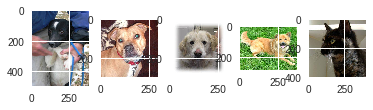

In [59]:
print(pred[:5])
for i in range(5):
  img = plt.imread('test/'+str(i+1)+'.jpg')
  plt.subplot(1, 5, i+1)
  plt.imshow(img)

In [60]:
pred = np.insert(pred, 0, np.arange(1, m_test+1), axis=1)
pred[:5]

array([[1.0000000e+00, 6.2429214e-01],
       [2.0000000e+00, 9.9997830e-01],
       [3.0000000e+00, 9.9998832e-01],
       [4.0000000e+00, 9.9996507e-01],
       [5.0000000e+00, 1.2363390e-03]], dtype=float32)

In [0]:
pred_df = pd.DataFrame(data=pred, columns=['id', 'label'], dtype='float32')

In [62]:
pred_df.head()

,id,label
0,1.0,0.624292
1,2.0,0.999978
2,3.0,0.999988
3,4.0,0.999965
4,5.0,0.001236


In [63]:
pred_df['id'] = pred_df['id'].astype('int64')
pred_df.head()

,id,label
0,1,0.624292
1,2,0.999978
2,3,0.999988
3,4,0.999965
4,5,0.001236


In [0]:
pred_df.to_csv('submission.csv', index=False)

In [65]:
!kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f submission.csv -m "10 Conv layers + 1 Dense"

Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

Kaggle Test Score = 0.28331